Solubility with descriptors

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("delaney_solubility_with_descriptors.csv")

In [3]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [4]:
y=df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
X=df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [9]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [10]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [11]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

In [12]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)
print('LR MSE (Train):',lr_train_mse)
print('LR R2 (Train):',lr_train_r2)
print('LR MSE (Test):',lr_test_mse)
print('LR R2 (Test):',lr_test_r2)


LR MSE (Train): 1.0075362951093687
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R2 (Test): 0.7891616188563282


In [21]:
lr_results=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns=['Methods','Training MSE','Training R2','Test MSE','Test R2']

In [22]:
lr_results

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


Random Forest

Training the Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [24]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_lr_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_lr_test_pred)
print('RF MSE (Train):',rf_train_mse)
print('RF R2 (Train):',rf_train_r2)
print('RF MSE (Test):',rf_test_mse)
print('RF R2 (Test):',rf_test_r2)

RF MSE (Train): 1.028227802112806
RF R2 (Train): 0.7645051774663391
RF MSE (Test): 1.407688264904896
RF R2 (Test): 0.7891616188563282


In [32]:
rf_results=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns=['Methods','Training MSE','Training R2','Test MSE','Test R2']

In [33]:
rf_results

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.764505,1.407688,0.789162


Model Comaparison

In [34]:
df_models=pd.concat([lr_results,rf_results],axis=0)
df_models

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.764505,1.407688,0.789162


In [35]:
df_models.reset_index(drop=True)

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.764505,1.407688,0.789162


Data Visualization of Prediction Results

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predict Logs')

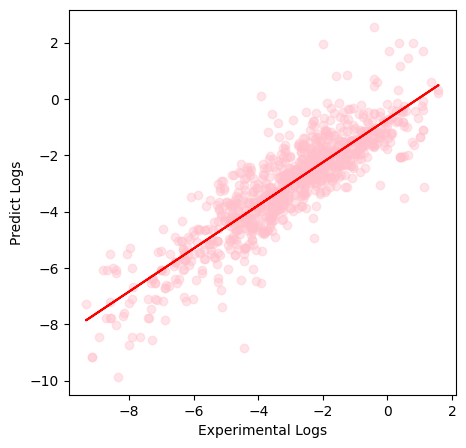

In [51]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,c='#FFC0CB',alpha=0.4)
z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)
plt.plot()
plt.plot(y_train,p(y_train),'#FF0000')
plt.xlabel('Experimental Logs')
plt.ylabel('Predict Logs')
